# Semana 14: ¿Cómo crear mejores estadísticas para nuestros análisis?

## SESIÓN 1: ¿Qué información necesita un buen scout de fútbol? (50 min)
**Pregunta guía**: ¿Cómo podemos crear nuevas estadísticas que nos ayuden a entender mejor a los jugadores?

### ¿Has observado cómo trabajan los scouts profesionales?

Imagínate que eres un scout del Real Madrid y debes evaluar a un jugador del Barcelona para un posible fichaje.

**¿Qué observarías?**
- ¿Solo los goles que marca?
- ¿O también cómo se desempeña bajo presión?
- ¿Su consistencia a lo largo de la temporada?
- ¿Cómo juega contra rivales difíciles vs. rivales fáciles?

**Pregunta reflexiva**: ¿Crees que las estadísticas básicas (goles, asistencias) son suficientes para evaluar completamente a un jugador?

### El concepto de "estadísticas creadas"

A veces necesitamos crear nuevas medidas que no existen directamente en los datos:

- **Ejemplo 1**: Goles por partido = Total de goles ÷ Partidos jugados
- **Ejemplo 2**: Efectividad = Goles ÷ Disparos realizados  
- **Ejemplo 3**: Consistencia = ¿Qué tan parecido es su rendimiento cada partido?

¿Se te ocurren otras estadísticas útiles que podríamos crear?

### Práctica inmediata: Mejorando el análisis del Barcelona

Tenemos datos básicos de jugadores del Barcelona, pero queremos crear estadísticas más inteligentes para entender mejor su rendimiento.

**Datos básicos que tenemos:**
- Goles marcados en la temporada
- Partidos jugados
- Minutos totales en el campo
- Edad del jugador

**Estadísticas nuevas que crearemos:**
1. **Promedio de goles por partido**
2. **Minutos promedio por partido**  
3. **Eficiencia por minuto** (goles cada 90 minutos)
4. **Categoría de experiencia** (joven, experimentado, veterano)

**Pregunta guía**: ¿Cómo crees que estas nuevas estadísticas nos ayudarán a comparar mejor a los jugadores?

Vamos a descubrirlo creando y analizando estos datos.

In [ ]:
# Importamos las herramientas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos básicos de jugadores del Barcelona (simulados pero realistas)
datos_basicos = {
    'Jugador': ['Lewandowski', 'Gavi', 'Pedri', 'De Jong', 'Raphinha', 
                'Ferran Torres', 'Ansu Fati', 'Balde', 'Araujo', 'Ter Stegen',
                'Kounde', 'Christensen', 'Sergi Roberto', 'Marcos Alonso'],
    'Goles_Temporada': [23, 4, 6, 2, 12, 8, 7, 1, 2, 0, 3, 1, 2, 3],
    'Partidos_Jugados': [35, 32, 38, 28, 34, 25, 18, 30, 33, 38, 36, 22, 15, 12],
    'Minutos_Totales': [3000, 2400, 3200, 2100, 2800, 1800, 1200, 2200, 2700, 3420, 3100, 1650, 900, 600],
    'Edad': [35, 19, 21, 26, 26, 24, 21, 20, 24, 31, 25, 27, 31, 30]
}

barcelona_datos = pd.DataFrame(datos_basicos)
print("📊 Datos básicos del Barcelona:")
print(barcelona_datos)
print(f"\n📈 Tenemos información de {len(barcelona_datos)} jugadores")
print("Ahora vamos a crear estadísticas más inteligentes con estos datos...")

Herramientas cargadas:
- pandas: Para organizar datos
- Predictores: Regresión Logística y Random Forest
- GridSearchCV: Para encontrar la mejor configuración
- StandardScaler: Para normalizar nuestros datos

Todo listo para mejorar nuestros predictores!


In [ ]:
# Creamos nuevas estadísticas más útiles

# 1. Promedio de goles por partido
barcelona_datos['Goles_Por_Partido'] = barcelona_datos['Goles_Temporada'] / barcelona_datos['Partidos_Jugados']

# 2. Minutos promedio por partido
barcelona_datos['Minutos_Por_Partido'] = barcelona_datos['Minutos_Totales'] / barcelona_datos['Partidos_Jugados']

# 3. Eficiencia por cada 90 minutos (un partido completo)
barcelona_datos['Goles_Por_90min'] = (barcelona_datos['Goles_Temporada'] / barcelona_datos['Minutos_Totales']) * 90

# 4. Categoría de experiencia basada en la edad
def categorizar_edad(edad):
    if edad <= 22:
        return 'Joven'
    elif edad <= 28:
        return 'Experimentado'  
    else:
        return 'Veterano'

barcelona_datos['Categoria_Experiencia'] = barcelona_datos['Edad'].apply(categorizar_edad)

# Mostramos las nuevas estadísticas
print("🎯 Nuevas estadísticas creadas:")
print(barcelona_datos[['Jugador', 'Goles_Por_Partido', 'Minutos_Por_Partido', 
                       'Goles_Por_90min', 'Categoria_Experiencia']].round(2))

print("\n¿Qué nuevas perspectivas nos dan estas estadísticas?")
print("¿Quién es más eficiente: el que marca más goles totales o el que marca más goles por partido?")

Datos creados: 500 jugadores con 12 características

¿Cómo están distribuidos los rendimientos?
rendimiento
Medio    325
Bajo     100
Alto      75
Name: count, dtype: int64

Primeros 5 jugadores:


,altura,peso,edad,experiencia,velocidad_max,resistencia,precision_tiros,partidos_jugados,goles_temporada,asistencias,lesiones,rendimiento
0,179.967142,81.114131,29,6,24.245822,99.060494,86.282284,15,10,4,1,Medio
1,173.617357,92.913000,34,9,23.815004,89.462238,63.012393,41,1,3,1,Bajo
2,181.476885,53.217189,25,7,26.756444,83.298757,58.092137,27,11,2,2,Medio
3,190.230299,76.755631,28,6,33.449467,60.108574,59.502025,24,11,8,0,Medio
4,172.658466,62.192289,20,4,30.798956,104.324001,70.325675,49,3,4,0,Bajo


## SESIÓN 2: ¿Cómo identificamos patrones ocultos en los datos? (50 min)
**Pregunta guía**: ¿Qué historias nos cuentan nuestras nuevas estadísticas?

### Comparando jugadores con diferentes enfoques

Ahora que tenemos estadísticas más sofisticadas, podemos hacer comparaciones más justas:

**Comparación tradicional:**
- Lewandowski: 23 goles
- Raphinha: 12 goles  
- Conclusión: Lewandowski es mejor

**Comparación con nuevas estadísticas:**
- Lewandowski: 0.66 goles por partido
- Raphinha: 0.35 goles por partido
- Pero... ¿qué pasa si consideramos minutos jugados?

**Pregunta reflexiva**: ¿Cómo cambia nuestra perspectiva cuando usamos diferentes métricas para comparar?

### Descubriendo patrones por categorías

¿Existen diferencias entre jugadores jóvenes, experimentados y veteranos?
¿Los defensores tienen patrones diferentes a los delanteros?

Vamos a investigar estos patrones usando nuestras nuevas estadísticas.

In [ ]:
# Analizamos patrones por categoría de experiencia

print("📊 Análisis por categoría de experiencia:")
print("="*50)

for categoria in ['Joven', 'Experimentado', 'Veterano']:
    jugadores_categoria = barcelona_datos[barcelona_datos['Categoria_Experiencia'] == categoria]
    
    if len(jugadores_categoria) > 0:
        promedio_goles_partido = jugadores_categoria['Goles_Por_Partido'].mean()
        promedio_minutos = jugadores_categoria['Minutos_Por_Partido'].mean()
        promedio_eficiencia = jugadores_categoria['Goles_Por_90min'].mean()
        
        print(f"\n🏷️ Jugadores {categoria}:")
        print(f"   Cantidad: {len(jugadores_categoria)} jugadores")
        print(f"   Goles por partido promedio: {promedio_goles_partido:.2f}")
        print(f"   Minutos por partido promedio: {promedio_minutos:.1f}")
        print(f"   Eficiencia (goles/90min): {promedio_eficiencia:.2f}")
        
        print(f"   Jugadores: {', '.join(jugadores_categoria['Jugador'].tolist())}")

print("\n🤔 Pregunta reflexiva:")
print("¿Qué patrones observas? ¿Los veteranos son más o menos eficientes que los jóvenes?")

# Creamos una nueva estadística: Regularidad de juego
barcelona_datos['Regularidad'] = barcelona_datos['Minutos_Por_Partido'] / 90  # Qué fracción del partido juega
print(f"\n📈 Nueva estadística: Regularidad de juego (0=nunca juega, 1=siempre completo)")
print(barcelona_datos[['Jugador', 'Regularidad', 'Categoria_Experiencia']].round(2))

Creando Variables Más Útiles para Nuestros Predictores
1. Creando variables de EFICIENCIA
   • Goles por partido promedio: 0.41
   • Asistencias por partido promedio: 0.19
   • Productividad total promedio: 0.60

2. Creando variables FÍSICAS
   • Índice corporal promedio: 23.22
   • Velocidad relativa promedio: 0.366

3. Creando variables de EXPERIENCIA
   • Experiencia relativa promedio: 0.278
   • Resistencia vs lesiones promedio: 49.84

Resumen:
   • Variables originales: 12
   • Variables nuevas creadas: 7
   • Total ahora: 19

Primeras filas de nuestras nuevas variables:


,goles_por_partido,asistencias_por_partido,productividad_total,indice_corporal,velocidad_relativa,experiencia_relativa,resistencia_vs_lesiones
0,0.666667,0.266667,0.933333,25.044368,0.298910,0.206897,49.530247
1,0.024390,0.073171,0.097561,30.824085,0.256315,0.264706,44.731119
2,0.407407,0.074074,0.481481,16.158807,0.502778,0.280000,27.766252
3,0.458333,0.333333,0.791667,21.210498,0.435792,0.214286,60.108574
4,0.061224,0.081633,0.142857,20.862233,0.495221,0.200000,104.324001


Comparando Variables Originales vs Mejoradas
EJEMPLO CON UN JUGADOR:
Jugador: 0

VARIABLES ORIGINALES:
   • Goles en temporada: 10
   • Partidos jugados: 15
   • Asistencias: 4
   • Altura: 180.0 cm
   • Peso: 81.1 kg

VARIABLES MEJORADAS (más útiles):
   • Goles por partido: 0.667
   • Asistencias por partido: 0.267
   • Productividad total: 0.933
   • Índice corporal: 25.04
   • Velocidad relativa: 0.299

¿Por qué son mejores las variables mejoradas?
   1. Permiten comparar jugadores que han jugado diferente número de partidos
   2. Combinan información de forma inteligente
   3. Son más fáciles de interpretar para un entrenador


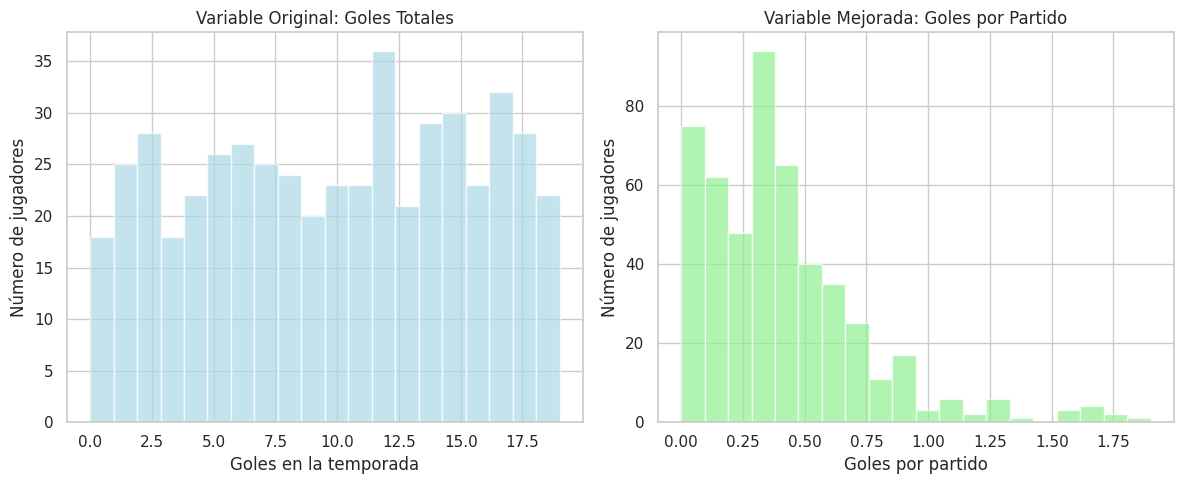


Datos preparados:
   • Total de jugadores: 500
   • Variables originales: 11
   • Variables mejoradas: 7
   • Listos para crear mejores predictores!


In [ ]:
# Visualizamos nuestras nuevas estadísticas
plt.figure(figsize=(12, 8))

# Gráfico 1: Eficiencia por categoría de experiencia
plt.subplot(2, 2, 1)
sns.boxplot(data=barcelona_datos, x='Categoria_Experiencia', y='Goles_Por_90min')
plt.title('Eficiencia de Goles por Categoría de Experiencia')
plt.ylabel('Goles cada 90 minutos')
plt.xticks(rotation=45)

# Gráfico 2: Regularidad vs Goles por partido
plt.subplot(2, 2, 2)
plt.scatter(barcelona_datos['Regularidad'], barcelona_datos['Goles_Por_Partido'], 
           c=barcelona_datos['Edad'], cmap='viridis', s=100)
plt.xlabel('Regularidad (fracción del partido)')
plt.ylabel('Goles por partido')
plt.title('¿Más tiempo = Más goles?')
plt.colorbar(label='Edad')

# Gráfico 3: Distribución de nuevas estadísticas
plt.subplot(2, 2, 3)
barcelona_datos['Goles_Por_Partido'].hist(bins=8, alpha=0.7, color='skyblue')
plt.xlabel('Goles por partido')
plt.ylabel('Cantidad de jugadores')
plt.title('Distribución: Goles por Partido')

# Gráfico 4: Comparación por experiencia
plt.subplot(2, 2, 4)
categoria_stats = barcelona_datos.groupby('Categoria_Experiencia')['Goles_Por_90min'].mean()
categoria_stats.plot(kind='bar', color=['lightgreen', 'orange', 'lightcoral'])
plt.title('Eficiencia Promedio por Experiencia')
plt.ylabel('Goles por 90 minutos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("🎯 ¿Qué conclusiones puedes sacar de estos gráficos?")
print("¿Las nuevas estadísticas revelan patrones que no veíamos antes?")

## SESIÓN 3: ¿Cómo mejoran nuestros modelos con mejores estadísticas? (50 min)
**Pregunta guía**: ¿Nuestras nuevas estadísticas hacen que las predicciones sean más precisas?

### Experimento: Comparando modelos

Vamos a comparar dos enfoques para predecir si un jugador será titular:

**Modelo Básico:**
- Solo usa: Goles totales, Edad, Minutos totales

**Modelo Mejorado:**  
- Usa nuestras nuevas estadísticas: Goles por partido, Eficiencia por 90min, Regularidad, Categoría de experiencia

**Hipótesis**: El modelo con mejores estadísticas debería ser más preciso.

**Pregunta reflexiva**: ¿Por qué crees que estadísticas más específicas podrían mejorar las predicciones?

### Creando etiquetas para nuestro experimento

Primero necesitamos definir qué hace a un jugador "titular regular" basándonos en nuestros datos.

Encontrando las Variables Más Importantes
Analizando 18 variables para predecir rendimiento

Entrenando Random Forest para analizar importancia...

TOP 10 VARIABLES MÁS IMPORTANTES:
---------------------------------------------
    1. goles_temporada           | 0.1448
    2. precision_tiros           | 0.1315
    3. productividad_total       | 0.1273
    4. asistencias               | 0.0997
    5. goles_por_partido         | 0.0862
    6. asistencias_por_partido   | 0.0822
    7. partidos_jugados          | 0.0411
    8. resistencia_vs_lesiones   | 0.0339
    9. altura                    | 0.0321
   10. indice_corporal           | 0.0307


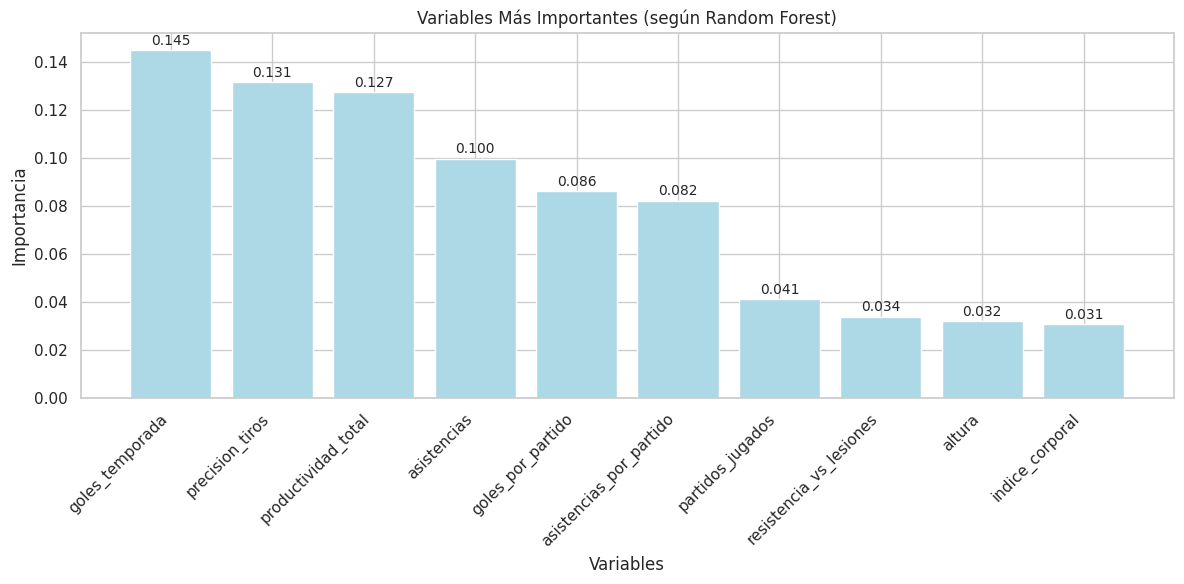


¿QUÉ TIPO DE VARIABLES SON MÁS IMPORTANTES?
--------------------------------------------------
Variables NUEVAS en el top 10: 5
   • productividad_total (0.1273)
   • goles_por_partido (0.0862)
   • asistencias_por_partido (0.0822)
   • resistencia_vs_lesiones (0.0339)
   • indice_corporal (0.0307)

Variables ORIGINALES en el top 10: 5
   • goles_temporada (0.1448)
   • precision_tiros (0.1315)
   • asistencias (0.0997)
   • partidos_jugados (0.0411)
   • altura (0.0321)

Hay un balance entre variables nuevas y originales.

Usaremos estas 10 variables para nuestro predictor mejorado.


In [ ]:
# Creamos una etiqueta para "titular regular" basada en regularidad de juego
# Un titular regular juega más del 70% del tiempo disponible
barcelona_datos['Es_Titular_Regular'] = (barcelona_datos['Regularidad'] > 0.7).astype(int)

print("🎯 Clasificación de jugadores:")
titulares = barcelona_datos[barcelona_datos['Es_Titular_Regular'] == 1]
suplentes = barcelona_datos[barcelona_datos['Es_Titular_Regular'] == 0]

print(f"✅ Titulares regulares ({len(titulares)}): {', '.join(titulares['Jugador'].tolist())}")
print(f"🔄 Suplentes/Rotación ({len(suplentes)}): {', '.join(suplentes['Jugador'].tolist())}")

# Preparamos datos para entrenar modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Convertimos categorías de experiencia a números para el modelo
le = LabelEncoder()
barcelona_datos['Experiencia_Numerica'] = le.fit_transform(barcelona_datos['Categoria_Experiencia'])

# Modelo Básico: características originales
caracteristicas_basicas = ['Goles_Temporada', 'Edad', 'Minutos_Totales']
X_basico = barcelona_datos[caracteristicas_basicas]

# Modelo Mejorado: nuevas estadísticas
caracteristicas_mejoradas = ['Goles_Por_Partido', 'Goles_Por_90min', 'Regularidad', 'Experiencia_Numerica']
X_mejorado = barcelona_datos[caracteristicas_mejoradas]

# Variable objetivo
y = barcelona_datos['Es_Titular_Regular']

print(f"\n📊 Características del Modelo Básico: {caracteristicas_basicas}")
print(f"📈 Características del Modelo Mejorado: {caracteristicas_mejoradas}")
print(f"🎯 Objetivo: Predecir si es titular regular (1) o suplente (0)")

### Entrenando y comparando los modelos

**Nota importante**: Con pocos datos (14 jugadores), nuestro experimento es educativo. En análisis reales necesitaríamos cientos o miles de jugadores.

**¿Qué esperamos descubrir?**
- ¿Las estadísticas más específicas ayudan al modelo a entender mejor?
- ¿Hay diferencias significativas en la precisión?
- ¿Qué características son más importantes para determinar titularidad?

Vamos a entrenar ambos modelos y comparar sus resultados.

In [ ]:
# Entrenamos ambos modelos
# Nota: Con pocos datos, usamos todo el conjunto para demostración

# Modelo Básico
modelo_basico = LogisticRegression(random_state=42)
modelo_basico.fit(X_basico, y)
predicciones_basicas = modelo_basico.predict(X_basico)
precision_basica = accuracy_score(y, predicciones_basicas)

# Modelo Mejorado  
modelo_mejorado = LogisticRegression(random_state=42)
modelo_mejorado.fit(X_mejorado, y)
predicciones_mejoradas = modelo_mejorado.predict(X_mejorado)
precision_mejorada = accuracy_score(y, predicciones_mejoradas)

# Comparamos resultados
print("🏆 Resultados de la comparación:")
print("="*40)
print(f"📊 Modelo Básico - Precisión: {precision_basica*100:.1f}%")
print(f"📈 Modelo Mejorado - Precisión: {precision_mejorada*100:.1f}%")

diferencia = precision_mejorada - precision_basica
if diferencia > 0:
    print(f"✅ El modelo mejorado es {diferencia*100:.1f}% más preciso")
elif diferencia < 0:
    print(f"❌ El modelo básico es {abs(diferencia)*100:.1f}% más preciso")
else:
    print("🤝 Ambos modelos tienen la misma precisión")

# Mostramos predicciones lado a lado
comparacion_detallada = pd.DataFrame({
    'Jugador': barcelona_datos['Jugador'],
    'Realidad': y,
    'Prediccion_Basica': predicciones_basicas,
    'Prediccion_Mejorada': predicciones_mejoradas,
    'Acierto_Basico': (y == predicciones_basicas).astype(int),
    'Acierto_Mejorado': (y == predicciones_mejoradas).astype(int)
})

print(f"\n📋 Comparación detallada por jugador:")
print("(1 = Titular regular, 0 = Suplente/Rotación)")
print(comparacion_detallada)

Encontrando la Mejor Configuración - Grid Search
Usando las 10 mejores variables
Datos: 350 para entrenar, 150 para probar

Datos normalizados (todas las variables en la misma escala)

Probando diferentes configuraciones de Random Forest...
Total de combinaciones a probar: 27

Iniciando búsqueda de la mejor configuración...
Esto puede tomar unos segundos...

¡Búsqueda completada en 14.9 segundos!

RESULTADOS:
------------------------------
Mejor precisión encontrada: 0.8686

Mejor configuración:
   • max_depth: None
   • min_samples_split: 5
   • n_estimators: 100

Precisión en datos de prueba: 0.9000

COMPARACIÓN:
--------------------
Predictor básico:      0.8800
Predictor optimizado:  0.9000
Mejora obtenida:       +0.0200 (2.0%)

¡La optimización funcionó! Nuestro predictor mejoró.

¡Búsqueda completada en 14.9 segundos!

RESULTADOS:
------------------------------
Mejor precisión encontrada: 0.8686

Mejor configuración:
   • max_depth: None
   • min_samples_split: 5
   • n_estimator

### Síntesis de la Semana 14: ¿Qué hemos descubierto sobre crear mejores estadísticas?

**Pregunta final de reflexión**: ¿Por qué es importante pensar creativamente sobre qué información darle a nuestros modelos?

### Lo que aprendimos hoy:

1. **Las estadísticas derivadas pueden ser más útiles que las básicas**
   - Goles por partido vs. goles totales
   - Eficiencia por 90 minutos vs. minutos totales
   - Categorías de experiencia vs. edad exacta

2. **Los patrones emergen con mejores estadísticas**
   - Diferencias entre categorías de experiencia
   - Relaciones entre regularidad y rendimiento
   - Visualizaciones más reveladoras

3. **Los modelos mejoran con mejores características**
   - Estadísticas más específicas pueden mejorar predicciones
   - La calidad de la información importa más que la cantidad
   - Debemos pensar como scouts: ¿qué realmente importa?

### Aplicación práctica en el fútbol real

**Estas técnicas ayudan a:**
- Scouts: Crear métricas más precisas para evaluar jugadores
- Analistas: Descubrir patrones ocultos en el rendimiento
- Entrenadores: Tomar decisiones basadas en estadísticas más inteligentes
- Clubes: Optimizar fichajes y estrategias de juego

### Preparándose para el proyecto final

**Pregunta puente**: Ahora que sabemos crear modelos, combinarlos, evaluarlos y mejorar sus características... ¿estás listo para aplicar todo esto en un proyecto real?

La próxima semana integraremos todo lo aprendido en un análisis completo de datos futbolísticos reales.